### **1. Importações**

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.colors import Normalize

bibliotecas = {
    "Pandas":pd,
    "Numpy":np,
    "Seaborn":sns,
    "Matplotlib":matplotlib}

print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.9.0
Numpy                |     1.26.4
Pandas               |      2.2.2
Seaborn              |     0.13.2


In [2]:
base = pd.read_csv("../data/categoria_flower_leaf_vegetables.csv")
base['Date'] = pd.to_datetime(base['Date'], format="%Y-%m-%d")
base.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Dia,Mês,Hora,Total,Item Name,Category Name,Dia da semana,Ano
0,2020-07-01,09:17,102900005115960,0.849,3.2,sale,No,1,7,9,2.72,Chinese Cabbage (2),Flower/Leaf Vegetables,Wednesday,2020
1,2020-07-01,09:19,102900005115823,0.421,10.0,sale,No,1,7,9,4.21,Shanghaiqing,Flower/Leaf Vegetables,Wednesday,2020
2,2020-07-01,09:20,102900005115908,0.539,8.0,sale,No,1,7,9,4.31,Caixin,Flower/Leaf Vegetables,Wednesday,2020
3,2020-07-01,09:21,102900005115779,0.338,8.0,sale,No,1,7,9,2.70,Yunnan Shengcai,Flower/Leaf Vegetables,Wednesday,2020
4,2020-07-01,09:22,102900005115779,0.213,8.0,sale,No,1,7,9,1.70,Yunnan Shengcai,Flower/Leaf Vegetables,Wednesday,2020


### **2. Visualizando os produtos mais vendidos no decorrer das horas**
- A % é baseada na porcentagem de vendas total do produto

In [3]:
tabela_vendas_por_hora = base.pivot_table(index='Item Name', columns='Hora', aggfunc='size', fill_value=0)

tabela_vendas_por_hora.columns = [f'{hora}h' for hora in tabela_vendas_por_hora.columns]
total_vendas_por_produto = tabela_vendas_por_hora.sum(axis=1)
percentual_vendas_por_hora = tabela_vendas_por_hora.div(total_vendas_por_produto, axis=0) * 100
percentual_vendas_por_hora = percentual_vendas_por_hora.round(2)
vendidos = pd.DataFrame(base['Item Name'].value_counts())
percentual_vendas_por_hora = pd.merge(percentual_vendas_por_hora, vendidos,how='left', on='Item Name')

percentual_vendas_por_hora.head()

,8h,9h,10h,11h,12h,13h,14h,15h,16h,17h,18h,19h,20h,21h,22h,23h,count
Item Name,,,,,,,,,,,,,,,,,
Aihao,0.0,7.41,29.63,3.70,0.00,0.00,0.00,0.00,0.00,3.70,7.41,14.81,18.52,14.81,0.00,0.00,27
Amaranth,0.0,15.19,20.55,12.69,5.49,3.32,4.06,6.37,8.06,9.49,8.43,4.52,1.62,0.21,0.00,0.01,10299
Amaranth (Bag),0.0,11.53,8.71,8.71,6.82,2.59,3.06,4.00,4.94,8.47,7.76,8.71,16.00,8.47,0.24,0.00,425
Artemisia Stelleriana,0.0,0.00,26.67,26.67,6.67,0.00,6.67,6.67,6.67,0.00,0.00,13.33,6.67,0.00,0.00,0.00,15
Basil (Bag),0.0,20.00,25.00,7.50,7.50,0.00,0.00,0.00,15.00,7.50,5.00,0.00,12.50,0.00,0.00,0.00,40


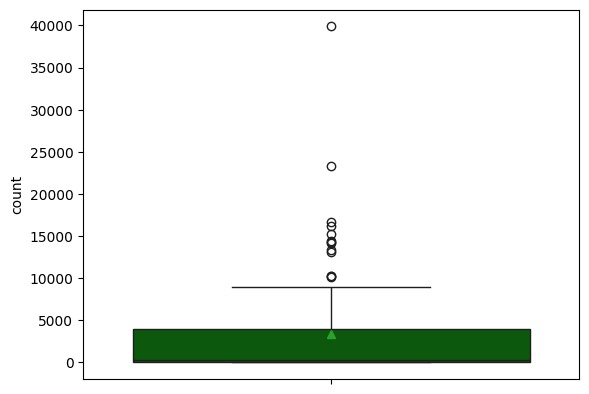

In [4]:
sns.boxplot(percentual_vendas_por_hora['count'], showmeans=True, color='darkgreen')
plt.savefig("../images/03_05_EDA_flower_leaf_vegetables_01_distribuicao.png")

In [5]:
percentual_vendas_por_hora.describe()

,8h,9h,10h,11h,12h,13h,14h,15h,16h,17h,18h,19h,20h,21h,22h,23h,count
count,99.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.0,10.100707,13.857677,11.629091,5.296869,4.862727,4.205455,5.639798,8.119495,9.254343,8.688990,6.974646,8.246667,3.064040,0.058384,0.000101,3353.212121
std,0.0,10.703394,7.038720,9.392300,4.566393,7.699454,3.204131,3.140778,4.310379,6.407014,4.606332,5.372331,10.073162,5.726438,0.367659,0.001005,6173.233191
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.0,7.020000,10.525000,8.315000,3.935000,2.410000,2.780000,4.085000,6.695000,7.375000,6.830000,3.785000,1.930000,0.105000,0.000000,0.000000,40.000000
50%,0.0,9.070000,14.090000,10.810000,5.210000,3.630000,4.040000,6.370000,8.630000,9.480000,9.070000,7.120000,5.710000,1.380000,0.000000,0.000000,306.000000
75%,0.0,12.265000,17.895000,12.725000,6.455000,4.880000,5.340000,7.600000,10.155000,11.050000,11.110000,8.680000,10.740000,4.060000,0.000000,0.000000,4014.000000
max,0.0,100.000000,40.000000,66.670000,40.000000,50.000000,25.000000,12.500000,21.950000,50.000000,25.000000,33.330000,66.670000,50.000000,3.570000,0.010000,39887.000000


In [6]:
percentual_vendas_por_hora

,8h,9h,10h,11h,12h,13h,14h,15h,16h,17h,18h,19h,20h,21h,22h,23h,count
Item Name,,,,,,,,,,,,,,,,,
Aihao,0.0,7.41,29.63,3.70,0.00,0.00,0.00,0.00,0.00,3.70,7.41,14.81,18.52,14.81,0.00,0.00,27
Amaranth,0.0,15.19,20.55,12.69,5.49,3.32,4.06,6.37,8.06,9.49,8.43,4.52,1.62,0.21,0.00,0.01,10299
Amaranth (Bag),0.0,11.53,8.71,8.71,6.82,2.59,3.06,4.00,4.94,8.47,7.76,8.71,16.00,8.47,0.24,0.00,425
Artemisia Stelleriana,0.0,0.00,26.67,26.67,6.67,0.00,6.67,6.67,6.67,0.00,0.00,13.33,6.67,0.00,0.00,0.00,15
Basil (Bag),0.0,20.00,25.00,7.50,7.50,0.00,0.00,0.00,15.00,7.50,5.00,0.00,12.50,0.00,0.00,0.00,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zhijiang Red Bolt,0.0,8.63,17.70,13.06,6.63,4.91,5.55,8.11,11.22,9.56,7.83,3.78,2.20,0.78,0.02,0.00,8732
Zhijiang Red Bolt (Bag),0.0,7.03,17.89,12.46,5.43,2.56,3.19,4.79,7.03,8.31,6.07,7.35,11.18,6.71,0.00,0.00,313
Zhimaxiancai,0.0,14.81,14.81,29.63,3.70,3.70,3.70,0.00,3.70,7.41,11.11,3.70,3.70,0.00,0.00,0.00,27


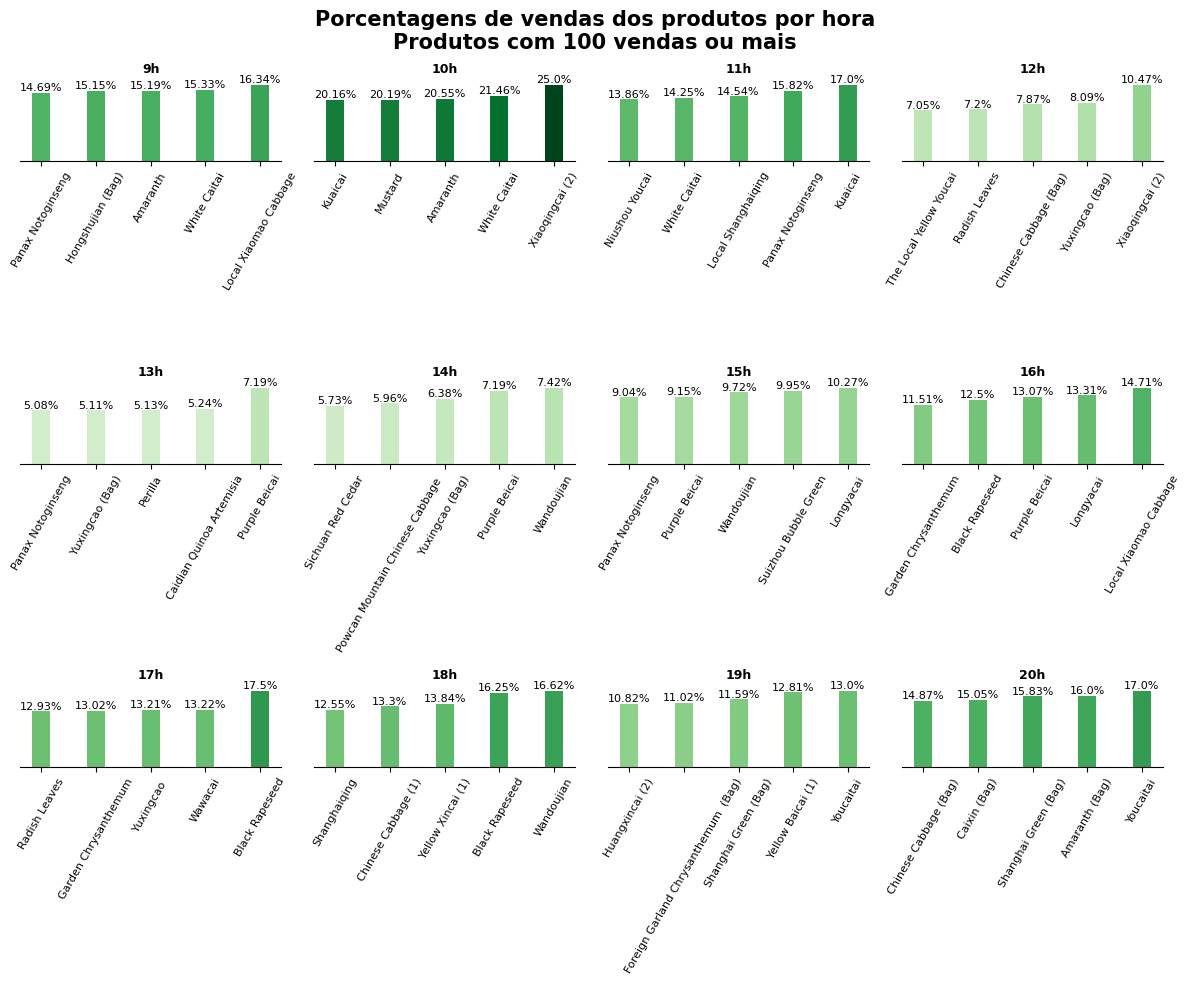

In [7]:
horas = ['9h','10h','11h','12h','13h','14h','15h','16h','17h','18h','19h','20h','21h']

fig,axs = plt.subplots(ncols=4,nrows=3,figsize=(12,10),tight_layout=True)

percentual_vendas_por_hora = percentual_vendas_por_hora.loc[percentual_vendas_por_hora['count'] >=100]

for hora,ax in zip(horas,axs.flat):
    
    b = percentual_vendas_por_hora[hora]
    a = b.sort_values(ascending=False).head(5).sort_values()
    norm = Normalize(vmin=0, vmax=25)
    cmap = plt.get_cmap('Greens')  
    colors = cmap(norm(a.values))
    w = 0.33
    ax.bar(a.index, a.values, color=colors, width=w)
    ax.set_title(f'{hora}', fontweight='bold', fontsize=9)
    ax.spines[['top','left','right']].set_visible(False)
    ax.yaxis.set_visible(False)
    for i in range(0,len(a.index)):
        ax.annotate(f'{a.values[i]}%',(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)
    ax.set_xticks(a.index)
    ax.set_xticklabels(labels=a.index, rotation=60, fontsize=8)
plt.suptitle("Porcentagens de vendas dos produtos por hora\nProdutos com 100 vendas ou mais", fontsize=15, fontweight='bold')
plt.savefig("../images/03_05_EDA_flower_leaf_vegetables_02_porcentagem_vendas_produtos.png")
plt.show()

### **3. Analisando as vendas, agrupadas pelo dia da semana**

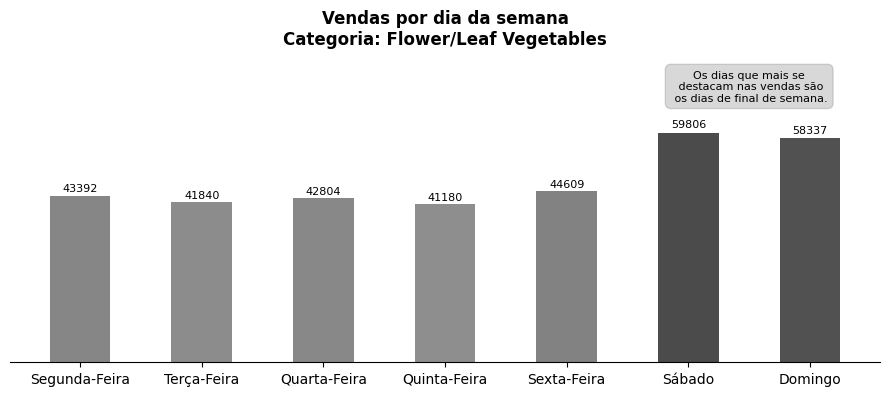

In [8]:
titulos = ['Segunda-Feira','Terça-Feira','Quarta-Feira','Quinta-Feira','Sexta-Feira','Sábado','Domingo']

a = base['Dia da semana'].value_counts().sort_index()
ind = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
a = a.reindex(ind)

fig, ax = plt.subplots(figsize=(9,4), tight_layout=True)
norm = Normalize(vmin=0, vmax=a.values.max()*1.3)
cmap = plt.get_cmap('Greys')
colors = cmap(norm(a.values))

ax.bar(a.index, a.values, color=colors, width=0.5)
ax.spines[['top','right','left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(len(a.index)))
ax.set_xticklabels(titulos)

for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)

ax.text(5.5, 68000, "Os dias que mais se\n destacam nas vendas são\n os dias de final de semana.", ha='center',fontsize=8,
        bbox=dict(facecolor='grey', edgecolor='grey', alpha=0.3, boxstyle='round,pad=0.5'))

plt.suptitle("Vendas por dia da semana\nCategoria: Flower/Leaf Vegetables", fontweight='bold', fontsize=12)
plt.savefig("../images/03_05_EDA_flower_leaf_vegetables_03_vendas_dia_semana.png")
plt.show()

### **4. Visualizando os produtos mais vendidos dessa categoria**

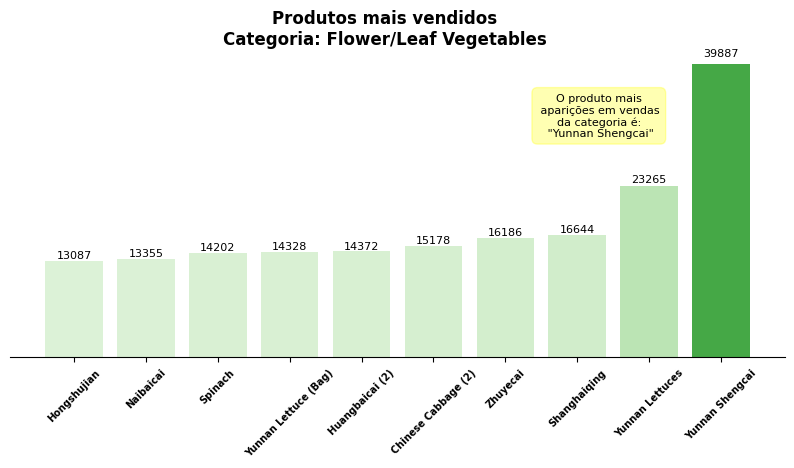

In [9]:
a = base['Item Name'].value_counts().sort_values(ascending=False).head(10).sort_values()

fig, ax = plt.subplots(figsize=(10,4))
norm = Normalize(vmin=0, vmax=a.values.max()*2)
cmap = plt.get_cmap('Greens')
colors = cmap(norm(a.values))

ax.bar(a.index, a.values, color=colors)
ax.spines[['top','right','left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(len(a.index)))
ax.set_xticklabels(labels=a.index, rotation=45, fontsize=7, fontweight='bold')
ax.bar(a.index[-1],a.values[-1], color='Green',alpha=0.4)

for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)

ax.text(7.3, 30000, f'O produto mais\n aparições em vendas\nda categoria é:\n "{a.index[-1]}"', ha='center',fontsize=8,
        bbox=dict(facecolor='yellow',edgecolor='yellow',alpha=0.3, boxstyle='round,pad=0.5'))
plt.suptitle("Produtos mais vendidos\nCategoria: Flower/Leaf Vegetables", fontweight='bold', fontsize=12)
plt.savefig("../images/03_05_EDA_flower_leaf_vegetables_04_produtos_mais_vendidos.png")
plt.show()

### **5. Analisando o total arrecadado com as vendas**

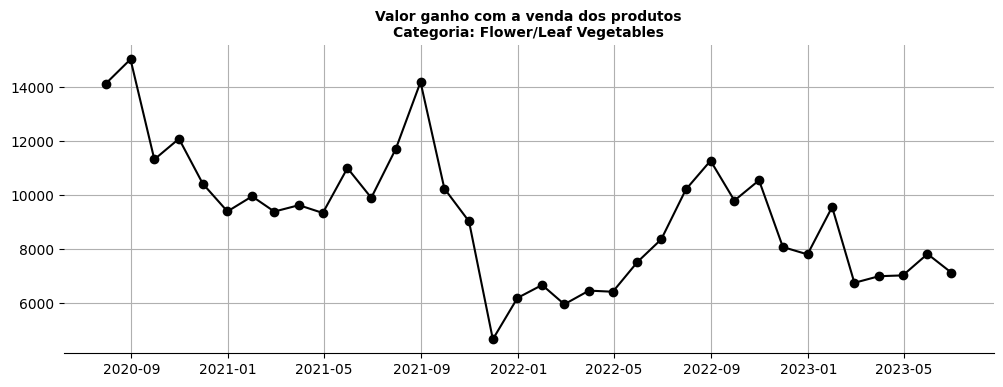

In [10]:
base_sale = base.loc[base['Sale or Return'] == 'sale']
base_datas = base_sale.set_index('Date')
base_datas = base_datas.resample('ME').count()
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(base_datas['Total'], marker='o', color='black')
ax.set_title("Valor ganho com a venda dos produtos\nCategoria: Flower/Leaf Vegetables", fontsize=10, fontweight='bold')
ax.spines[['top','left','right']].set_visible(False)
ax.grid()
plt.savefig("../images/03_05_EDA_flower_leaf_vegetables_05_valor_ganho_vendas.png")
plt.show()

### **6. Analisando as vendas agrupadas pelos meses**

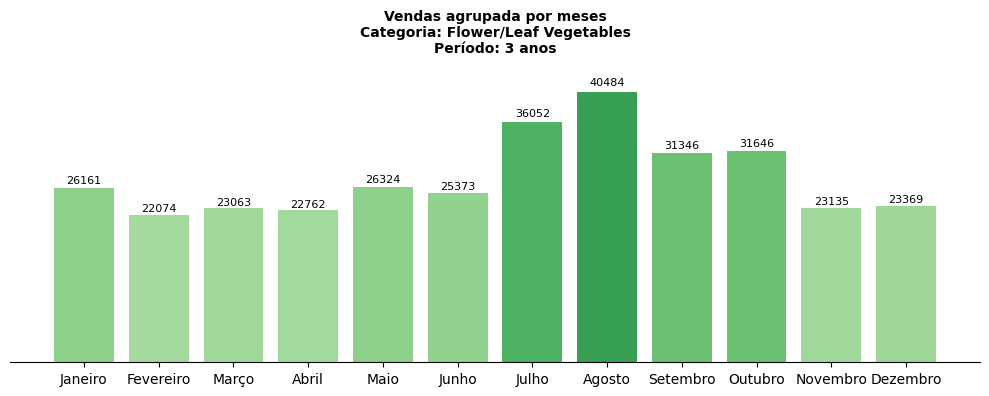

In [11]:
a = base_sale['Mês'].value_counts().sort_index()
meses = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']

fig, ax = plt.subplots(figsize=(10,4), tight_layout=True)
norm = Normalize(vmin=0, vmax=a.values.max()*1.5)
cmap = plt.get_cmap('Greens')
colors = cmap(norm(a.values))

ax.bar(a.index, a.values, color=colors)
ax.spines[['top','right','left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(1,13))
ax.set_xticklabels(meses)

for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)

plt.suptitle("Vendas agrupada por meses\nCategoria: Flower/Leaf Vegetables\nPeríodo: 3 anos", fontweight='bold', fontsize=10)
plt.savefig("../images/03_05_EDA_flower_leaf_vegetables_06_vendas_meses.png")
plt.show()

### **7. Analisando as vendas agrupadas pelo ano e mês**

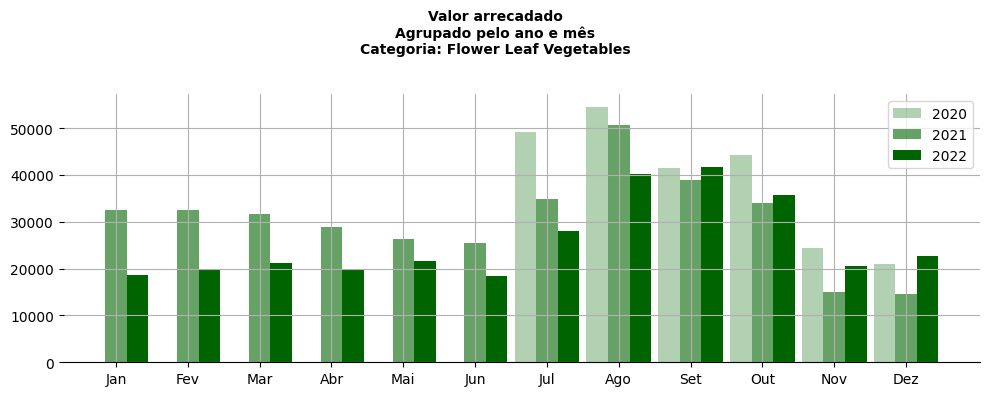

In [12]:
a = base_sale.groupby(["Ano","Mês"])['Total'].sum().reset_index()

meses = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']

vinte = a.loc[a.Ano == 2020]
vinteeum = a.loc[a.Ano == 2021]
vinteedois = a.loc[a.Ano == 2022]

fig, ax = plt.subplots(figsize=(10,4), tight_layout=True)
norm = Normalize(vmin=0, vmax=a.values.max()*2)
cmap = plt.get_cmap('Blues')
colors = cmap(norm(a.values))

w = 0.3
ax.grid()
ax.bar(vinte['Mês']-w, vinte['Total'], color="darkgreen", width=w, label="2020", alpha=0.3)
ax.bar(vinteeum['Mês'], vinteeum['Total'], color="darkgreen", width=w, label="2021", alpha=0.6)
ax.bar(vinteedois['Mês']+w, vinteedois['Total'], color="darkgreen", width=w, label="2022")
ax.spines[['top','right','left']].set_visible(False)
ax.legend()
ax.set_xticks(range(1,13))
ax.set_xticklabels(meses)

plt.suptitle("Valor arrecadado\nAgrupado pelo ano e mês\nCategoria: Flower Leaf Vegetables\n", fontweight='bold', fontsize=10)
plt.savefig("../images/03_05_EDA_flower_leaf_vegetables_07_vendas_ano_mes.png")
plt.show()

### **8. Analisando os dois produtos com maiores taxas de perdas**

In [13]:
produtos_categoria = base['Item Name'].unique()

taxa_perdas = pd.read_csv("../data/annex4.csv")
taxa_perdas = taxa_perdas.loc[taxa_perdas['Item Name'].isin(produtos_categoria)]

In [14]:
taxa_perdas.sort_values(by='Loss Rate (%)', ascending=False).head(3)

,Item Code,Item Name,Loss Rate (%)
181,102900011033081,Chuncai,29.03
67,102900011006689,Dongmenkou Xiaobaicai,27.84
68,102900011006948,Foreign Garland Chrysanthemum,26.16


#### **8.1 Chuncai**

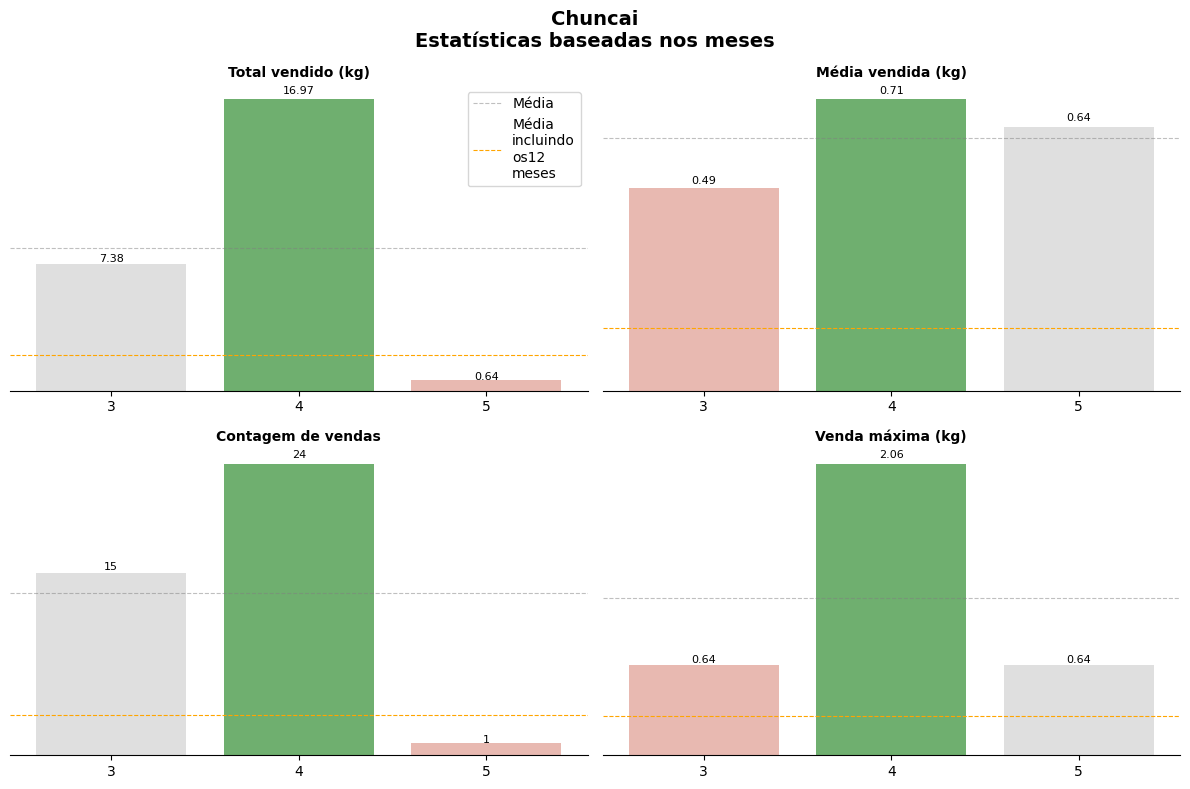

In [15]:
import sys 
sys.path.append("../functions/")
from funcoes import estatisticas_produto

estatisticas_produto(base, "Chuncai", salvar=True,
                     salvar_como="03_05_EDA_flower_leaf_vegetables_08_chuncai_1")

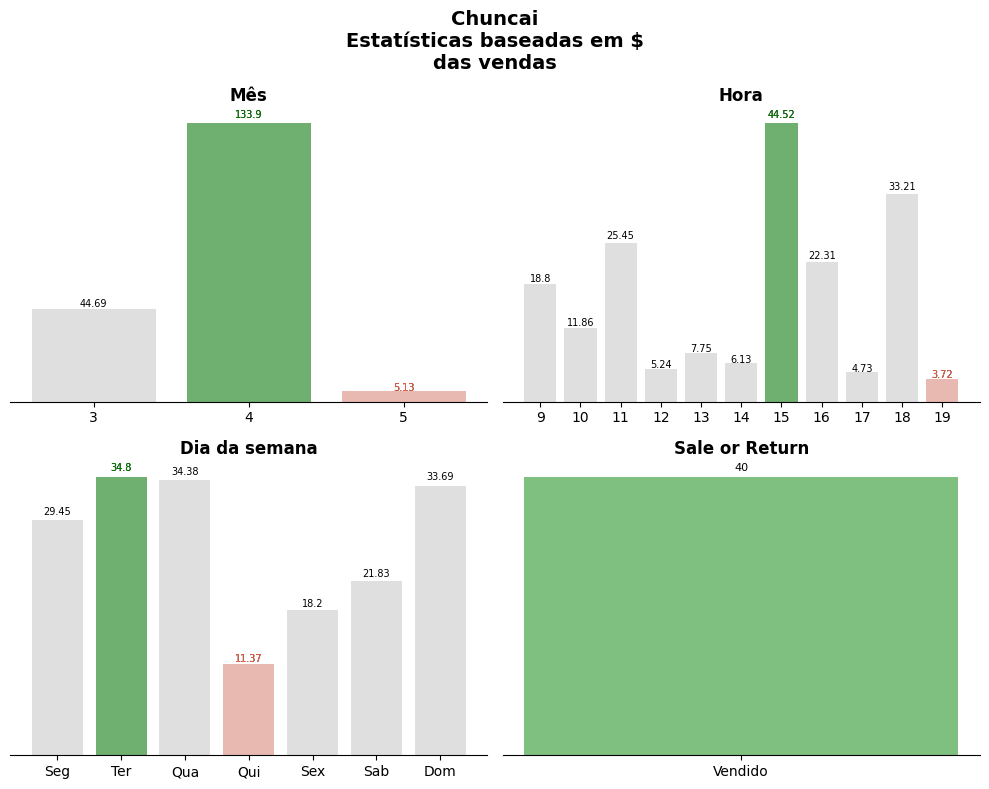

In [16]:
sys.path.append('../functions/')
from funcoes import estatisticas_produto_dois

estatisticas_produto_dois(base, "Chuncai", salvar=True,
                     salvar_como="03_05_EDA_flower_leaf_vegetables_09_chuncai_2")

#### **8.2. Dongmenkou Xiaobaicai**

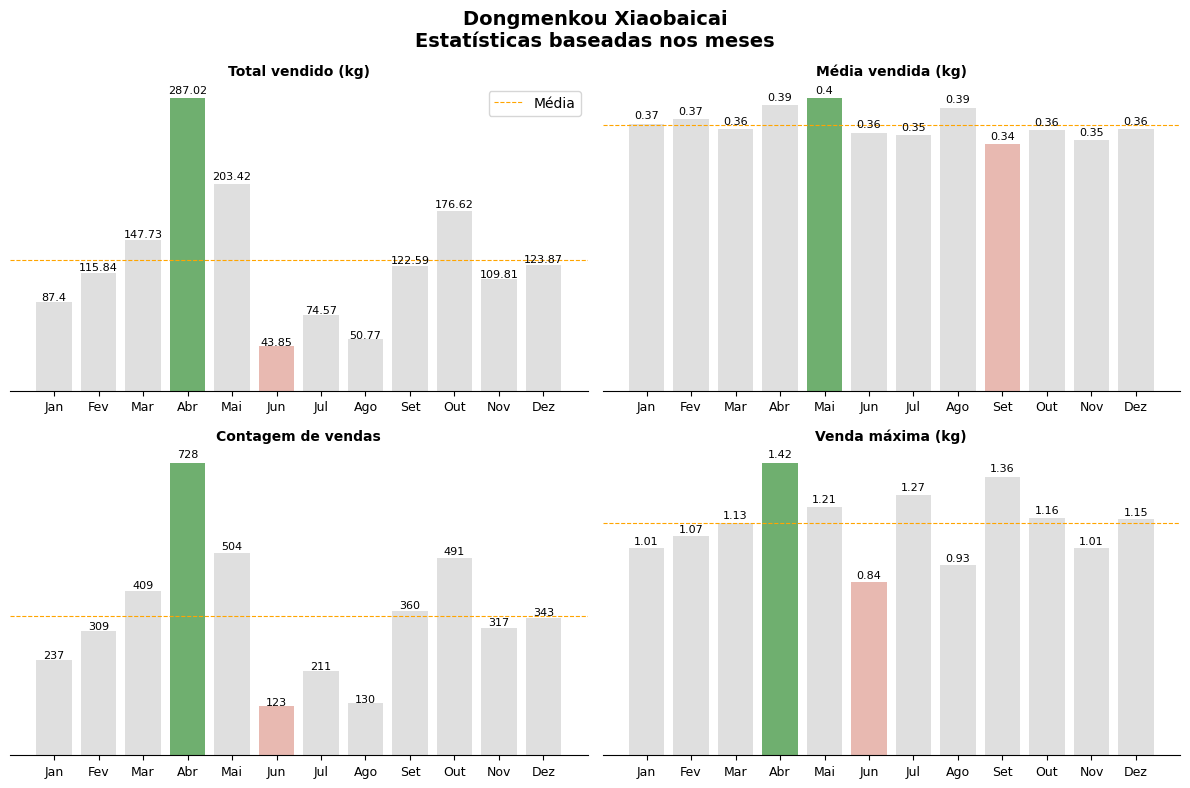

In [17]:
estatisticas_produto(base, "Dongmenkou Xiaobaicai", salvar=True,
                     salvar_como="03_05_EDA_flower_leaf_vegetables_10_Dongmenkou Xiaobaicai_1")

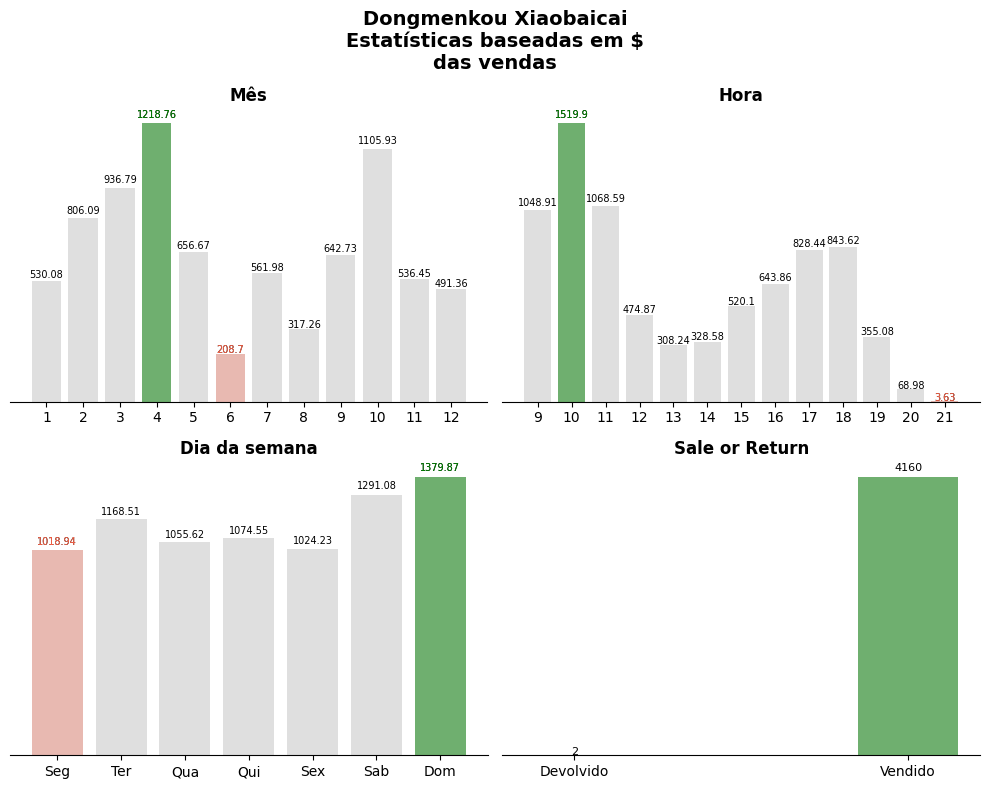

In [18]:
estatisticas_produto_dois(base, "Dongmenkou Xiaobaicai", salvar=True,
                     salvar_como="03_05_EDA_flower_leaf_vegetables_11_Dongmenkou Xiaobaicai_2")